In [1]:
import pandas as pd

# 1. Data preprocessing

# 1.1 Đọc dữ liệu

In [2]:
# link data UCI: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing?fbclid=IwAR1GZiF4eLXHRnASajLLybwsJvTQRo7RIO9rJ1nuJCYpT6WR9IazQGUcEJc
df = pd.read_csv('abalone.data')
print(df.head(5))

   M  0.455  0.365  0.095   0.514  0.2245   0.101   0.15  15
0  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
1  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
2  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
3  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7
4  I  0.425  0.300  0.095  0.3515  0.1410  0.0775  0.120   8


In [3]:
print(df.shape)

(4176, 9)


In [4]:
# hiển thị thông tin các cột dữ liệu
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   0.455   4176 non-null   float64
 2   0.365   4176 non-null   float64
 3   0.095   4176 non-null   float64
 4   0.514   4176 non-null   float64
 5   0.2245  4176 non-null   float64
 6   0.101   4176 non-null   float64
 7   0.15    4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


#### hiển thị mô tả

In [5]:
# hiển thị mô tả
df.describe()

,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
count,4176.000000,4176.000000,4176.000000,4176.000000,4176.00000,4176.000000,4176.000000,4176.000000
mean,0.524009,0.407892,0.139527,0.828818,0.35940,0.180613,0.238852,9.932471
std,0.120103,0.099250,0.041826,0.490424,0.22198,0.109620,0.139213,3.223601
min,0.075000,0.055000,0.000000,0.002000,0.00100,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.18600,0.093375,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799750,0.33600,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153250,0.50200,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.48800,0.760000,1.005000,29.000000


### kiểm tra giá trị bị thiếu NaN

In [6]:
# kiểm tra giá trị bị thiếu NaN
df.isna().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

In [7]:
# kiểm tra các hàng trùng lập
df.duplicated().sum()

0

In [8]:
columns = df.columns
types = df.dtypes
print(columns)
print(types)

Index(['M', '0.455', '0.365', '0.095', '0.514', '0.2245', '0.101', '0.15',
       '15'],
      dtype='object')
M          object
0.455     float64
0.365     float64
0.095     float64
0.514     float64
0.2245    float64
0.101     float64
0.15      float64
15          int64
dtype: object


<Axes: xlabel='15'>

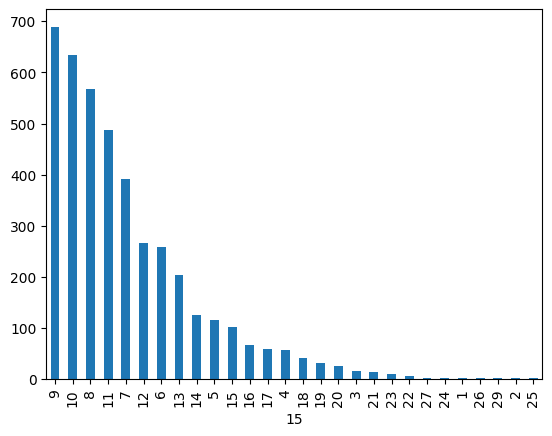

In [11]:
# vẽ biểu đồ để xem phân bố các class có đồng đều không
# => kết quả cho thấy class "no" chiếm tỉ lệ cao hơn rất nhiều so với "yes"
g = df[columns[-1]].value_counts()
g.plot.bar()

In [22]:
# phân loại từng giá trị trong cột bằng các số
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[columns[i]])
    df[columns[i]] = le.transform(df[columns[i]])
df

C:\Users\ASUS\AppData\Local\Temp\ipykernel_20472\291149250.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':
C:\Users\ASUS\AppData\Local\Temp\ipykernel_20472\291149250.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if types[i]=='object':


,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


# 1.4 Chuẩn hóa dữ liệu

In [23]:
data = df.values
print(data[:2])

[[2.     0.35   0.265  0.09   0.2255 0.0995 0.0485 0.07   7.    ]
 [0.     0.53   0.42   0.135  0.677  0.2565 0.1415 0.21   9.    ]]


In [24]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(4176, 8)
(4176,)


In [25]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[1.         0.37162162 0.35294118 0.07964602 0.07915707 0.06624075
 0.06319947 0.06826109]


# 1.5 Chia dữ liệu thành tập train và test and modeling

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42, test_size=0.2)
X_train.shape, y_train.shape

NameError: name 'X_scaled' is not defined

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#model = DecisionTreeClassifier()
model = KNeighborsClassifier()
model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
# inference for the test data 
y_pred = model.predict(X_test)

In [ ]:
# evaluation
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         3
         4.0       0.32      0.40      0.35        15
         5.0       0.29      0.31      0.30        26
         6.0       0.24      0.25      0.24        57
         7.0       0.20      0.30      0.24        66
         8.0       0.24      0.27      0.25       113
         9.0       0.21      0.30      0.24       128
        10.0       0.23      0.26      0.24       132
        11.0       0.23      0.21      0.22       101
        12.0       0.09      0.06      0.07        53
        13.0       0.10      0.06      0.07        34
        14.0       0.17      0.05      0.07        22
        15.0       0.00      0.00      0.00        25
        16.0       0.00      0.00      0.00        16
        17.0       0.33      0.14      0.20        14
        18.0       0.00      0.00      0.00        12
        19.0       0.00    

/Users/macos/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macos/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/macos/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
#model = LinearRegression()
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
error = mean_absolute_error(y_test,y_pred)
print(error)

2.0789473684210527
